In [1]:
import os
import glob
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr #Loocv

import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.append('custom_function/')
import clustering

In [3]:
def cluster_rdm(cluster_results_region,cluster_model='cl_k3'):
    dissim_cluster_result = pd.DataFrame(index = cluster_results_region.index,
                                         columns = cluster_results_region.index)
    for i in dissim_cluster_result.index:
        for j in dissim_cluster_result.columns:
            # cluster result was in the last column
            if cluster_results_region.loc[i,cluster_model] == cluster_results_region.loc[j,cluster_model]:
                dissim_cluster_result.loc[i,j] = 0
            else:
                dissim_cluster_result.loc[i,j] = 1
            dissim_cluster_result = dissim_cluster_result.astype(float)
            
    return(dissim_cluster_result)

In [4]:
relationships = pd.read_csv('../DataCleanPCA/input_data/RelDim_labels/159relationships_fix_label.csv',
                           index_col=0)
relationships = relationships['0'].to_list()

dim_rel_scaled_total = pd.read_csv('../DataCleanPCA/input_data/Nations/Total/output_data/Total_scale_var_33v.csv',index_col=0)
dim_rel_scaled_total.index = relationships
pca_5c_33d_scores_total = pd.read_csv('../DataCleanPCA/input_data/Nations/Total/pca_results/Total_scores_var_5c_33d.csv',index_col=0) 
pca_5c_33d_scores_total.columns = ['Activeness','Exchange','Formality','Valence','Equality']
pca_5c_33d_scores_total.index = relationships
# the two dimensions are reversed
pca_5c_33d_scores_total['Activeness'] = -pca_5c_33d_scores_total['Activeness']
pca_5c_33d_scores_total['Formality'] = -pca_5c_33d_scores_total['Formality']
pca_5c_33d_scores_total['Valence'] = -pca_5c_33d_scores_total['Valence']

# Total world

## clustering results

Text(0, 0.5, 'Silhouette Value')

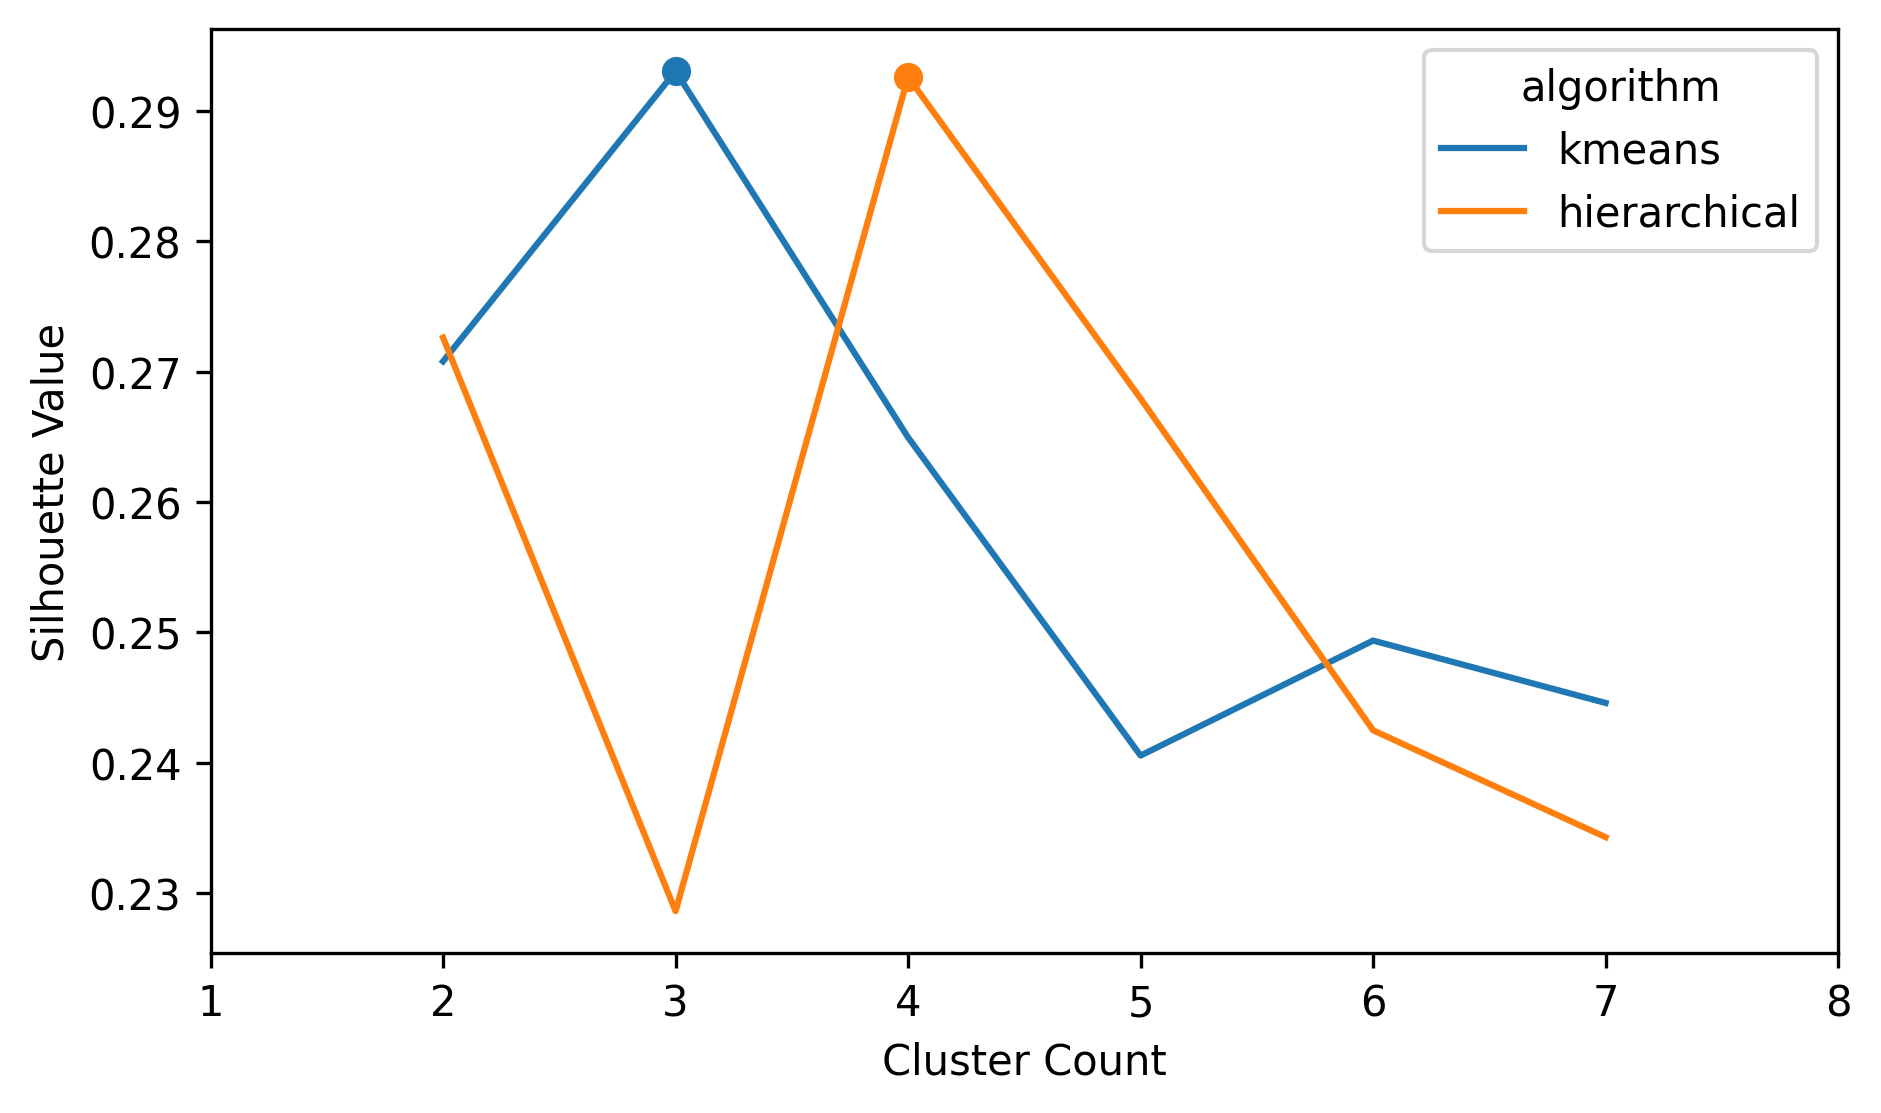

In [5]:
silhouette_result_df = clustering.optimalK_grouped(data_type='df', data=dim_rel_scaled_total, 
                            algorithm1='kmeans', algorithm2='hierarchical', 
                            title='', random_state=2022, maxClusters=8)
# Plot the silhouette scores for each algorithm
plt.figure(figsize=(7,4),dpi=300)
plt.xlim(1,8)
sns.lineplot(data=silhouette_result_df, x="clusterCount", y="silhouette", hue="algorithm")

algorithm1_df = silhouette_result_df[silhouette_result_df['algorithm']=='kmeans']
algorithm2_df = silhouette_result_df[silhouette_result_df['algorithm']=='hierarchical']
plt.scatter(algorithm1_df.loc[algorithm1_df['silhouette'].idxmax(),'clusterCount'], 
                algorithm1_df['silhouette'].max())
plt.scatter(algorithm2_df.loc[algorithm2_df['silhouette'].idxmax(),'clusterCount'], 
                algorithm2_df['silhouette'].max())
plt.xlabel('Cluster Count')
plt.ylabel('Silhouette Value')

In [6]:
raw_results = clustering.create_cluster_models(data_type = "df",data = dim_rel_scaled_total,
                        methods=['KMeans'],ks=[3],keep_orig=True)

raw_results.to_csv('output_data/categorical_model/total_world/total_raw33d_dissim_3k.csv')

for n in range(len(raw_results['cl_k3'].unique())):
    each_cluster = raw_results.index[raw_results['cl_k3']==n]
    print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
    print(*raw_results.index[raw_results['cl_k3']==n], sep = ", ")


Cluster 1 Relationship:55
Parent and Child, Parent and Teenager, Wife and Husband, Fiance and Fiancee, Between Siblings, Between cousins, Between Close Friends, Between second cousins, Parent and Infant, Grandparent and Grandchild, Step-parent and Step-child, Foster-parent and Foster-child, Godparent and Godchild, Step-grandparent and Step-grandchild, Ancestor and Descendant, Bride and Groom, Man and His Mistress, Brother and Sister, Between step-siblings, Between close relatives, Between twins, Between a person and their family friends, Between a person and their deceased spouse, Between religious followers, Man and God, Between peers, Between classmates, Between roommates, Between sorority sisters, Between fraternity brothers, Bride and Bridesmaid, Groom and Groomsman, Between friends, Between Facebook Friends, Between childhood friends, Between pen-friends, Between friends with benefits, Between romantic lovers, Between life-partners, Between soul-mates, Between church members, Bet

In [7]:
raw_results = clustering.create_cluster_models(data_type = "df",data = dim_rel_scaled_total,
                        methods=['Hierarchical'],ks=[3],keep_orig=True)
for n in range(len(raw_results['cl_h3'].unique())):
    each_cluster = raw_results.index[raw_results['cl_h3']==n]
    print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
    print(*raw_results.index[raw_results['cl_h3']==n], sep = ", ")


Cluster 1 Relationship:129
Parent and Child, Parent and Teenager, Wife and Husband, Fiance and Fiancee, Between Siblings, Between a person and their in-laws, Between cousins, Employer and Employee, Interviewer and Job applicant, Nurse and Patient, Therapist and Patient, Salesperson and Customer, Between Business Partners, Teacher and Student, Professor and Graduate student, Master and Servant, Between Close Friends, Between casual acquaintances, Between teammates in sports, Between second cousins, Parent and Infant, Grandparent and Grandchild, Step-parent and Step-child, Foster-parent and Foster-child, Godparent and Godchild, Step-grandparent and Step-grandchild, Ancestor and Descendant, Bride and Groom, Brother and Sister, Between step-siblings, Between distant relatives, Between close relatives, Between twins, Between a person and their family friends, Between a person and their deceased spouse, Manager and Staff, Foreman and Laborer, Owner and Manager, Union leader and union member

## Plot results(in R)

In [2]:
# Circular_dengram
library(ggraph)
library(igraph)
library(tidyverse)

In [10]:
# transfer labels of relationships into simple form 
simple_rels = read.csv('../../Study2/input_data/Rel_labels/labels_different_versions.csv',
                       row.names=1)
cluster_results = read.csv('output_data/categorical_model/total_world/total_raw33d_dissim_3k.csv',
                           row.names=1)
for (rel in rownames(cluster_results)){
    cluster_results[rel,'rel_simple'] = simple_rels[simple_rels['one']==rel,'common']
}

rownames(cluster_results) = cluster_results$'rel_simple'

cluster_k3 = as.matrix(cluster_results['cl_k3'])
cluster_k3 = data.frame(cluster_k3[order(cluster_k3[,1]),])
colnames(cluster_k3) =c('cl_k3')

Private = rownames(cluster_k3 %>% filter(cl_k3==0))
Hostile = rownames(cluster_k3 %>% filter(cl_k3==1))
Public = rownames(cluster_k3 %>% filter(cl_k3==2))

cluster_k3 = cluster_k3 %>% mutate(cluster = 
                        case_when(cl_k3==0~'Private',
                                  cl_k3==1~'Hostile',
                                  cl_k3==2~'Public'))

In [11]:
# create a data frame giving the hierarchical structure of your individuals
d1=data.frame(from="Total", to=c('Private','Hostile','Public'))
d2=data.frame(from=c(cluster_k3$'cluster'),to=c(Private,Hostile,Public))
edges=rbind(d1, d2)

# create a vertices data.frame. One line per object of our hierarchy
vertices = data.frame(
  name = unique(c(as.character(edges$from), as.character(edges$to))) , 
  value = runif(163)
) 
# Let's add a column with the group of each name. It will be useful later to color points
vertices$group = edges$from[ match( vertices$name, edges$to ) ]

#Let's add information concerning the label we are going to add: angle, horizontal adjustement and potential flip
#calculate the ANGLE of the labels
vertices$id=NA
myleaves=which(is.na( match(vertices$name, edges$from) ))
nleaves=length(myleaves)
vertices$id[ myleaves ] = seq(1:nleaves)
vertices$angle= 90 - 360 * vertices$id / nleaves

# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
vertices$hjust<-ifelse( vertices$angle < -90, 1, 0)

# flip angle BY to make them readable
vertices$angle<-ifelse(vertices$angle < -90, vertices$angle+180, vertices$angle)

# Create a graph object
mygraph <- graph_from_data_frame( edges, vertices=vertices )

my_colors = c('Hostile'='#52DCF5','Public'='#3FCA36','Private'='#FF4C27')

png 
  2

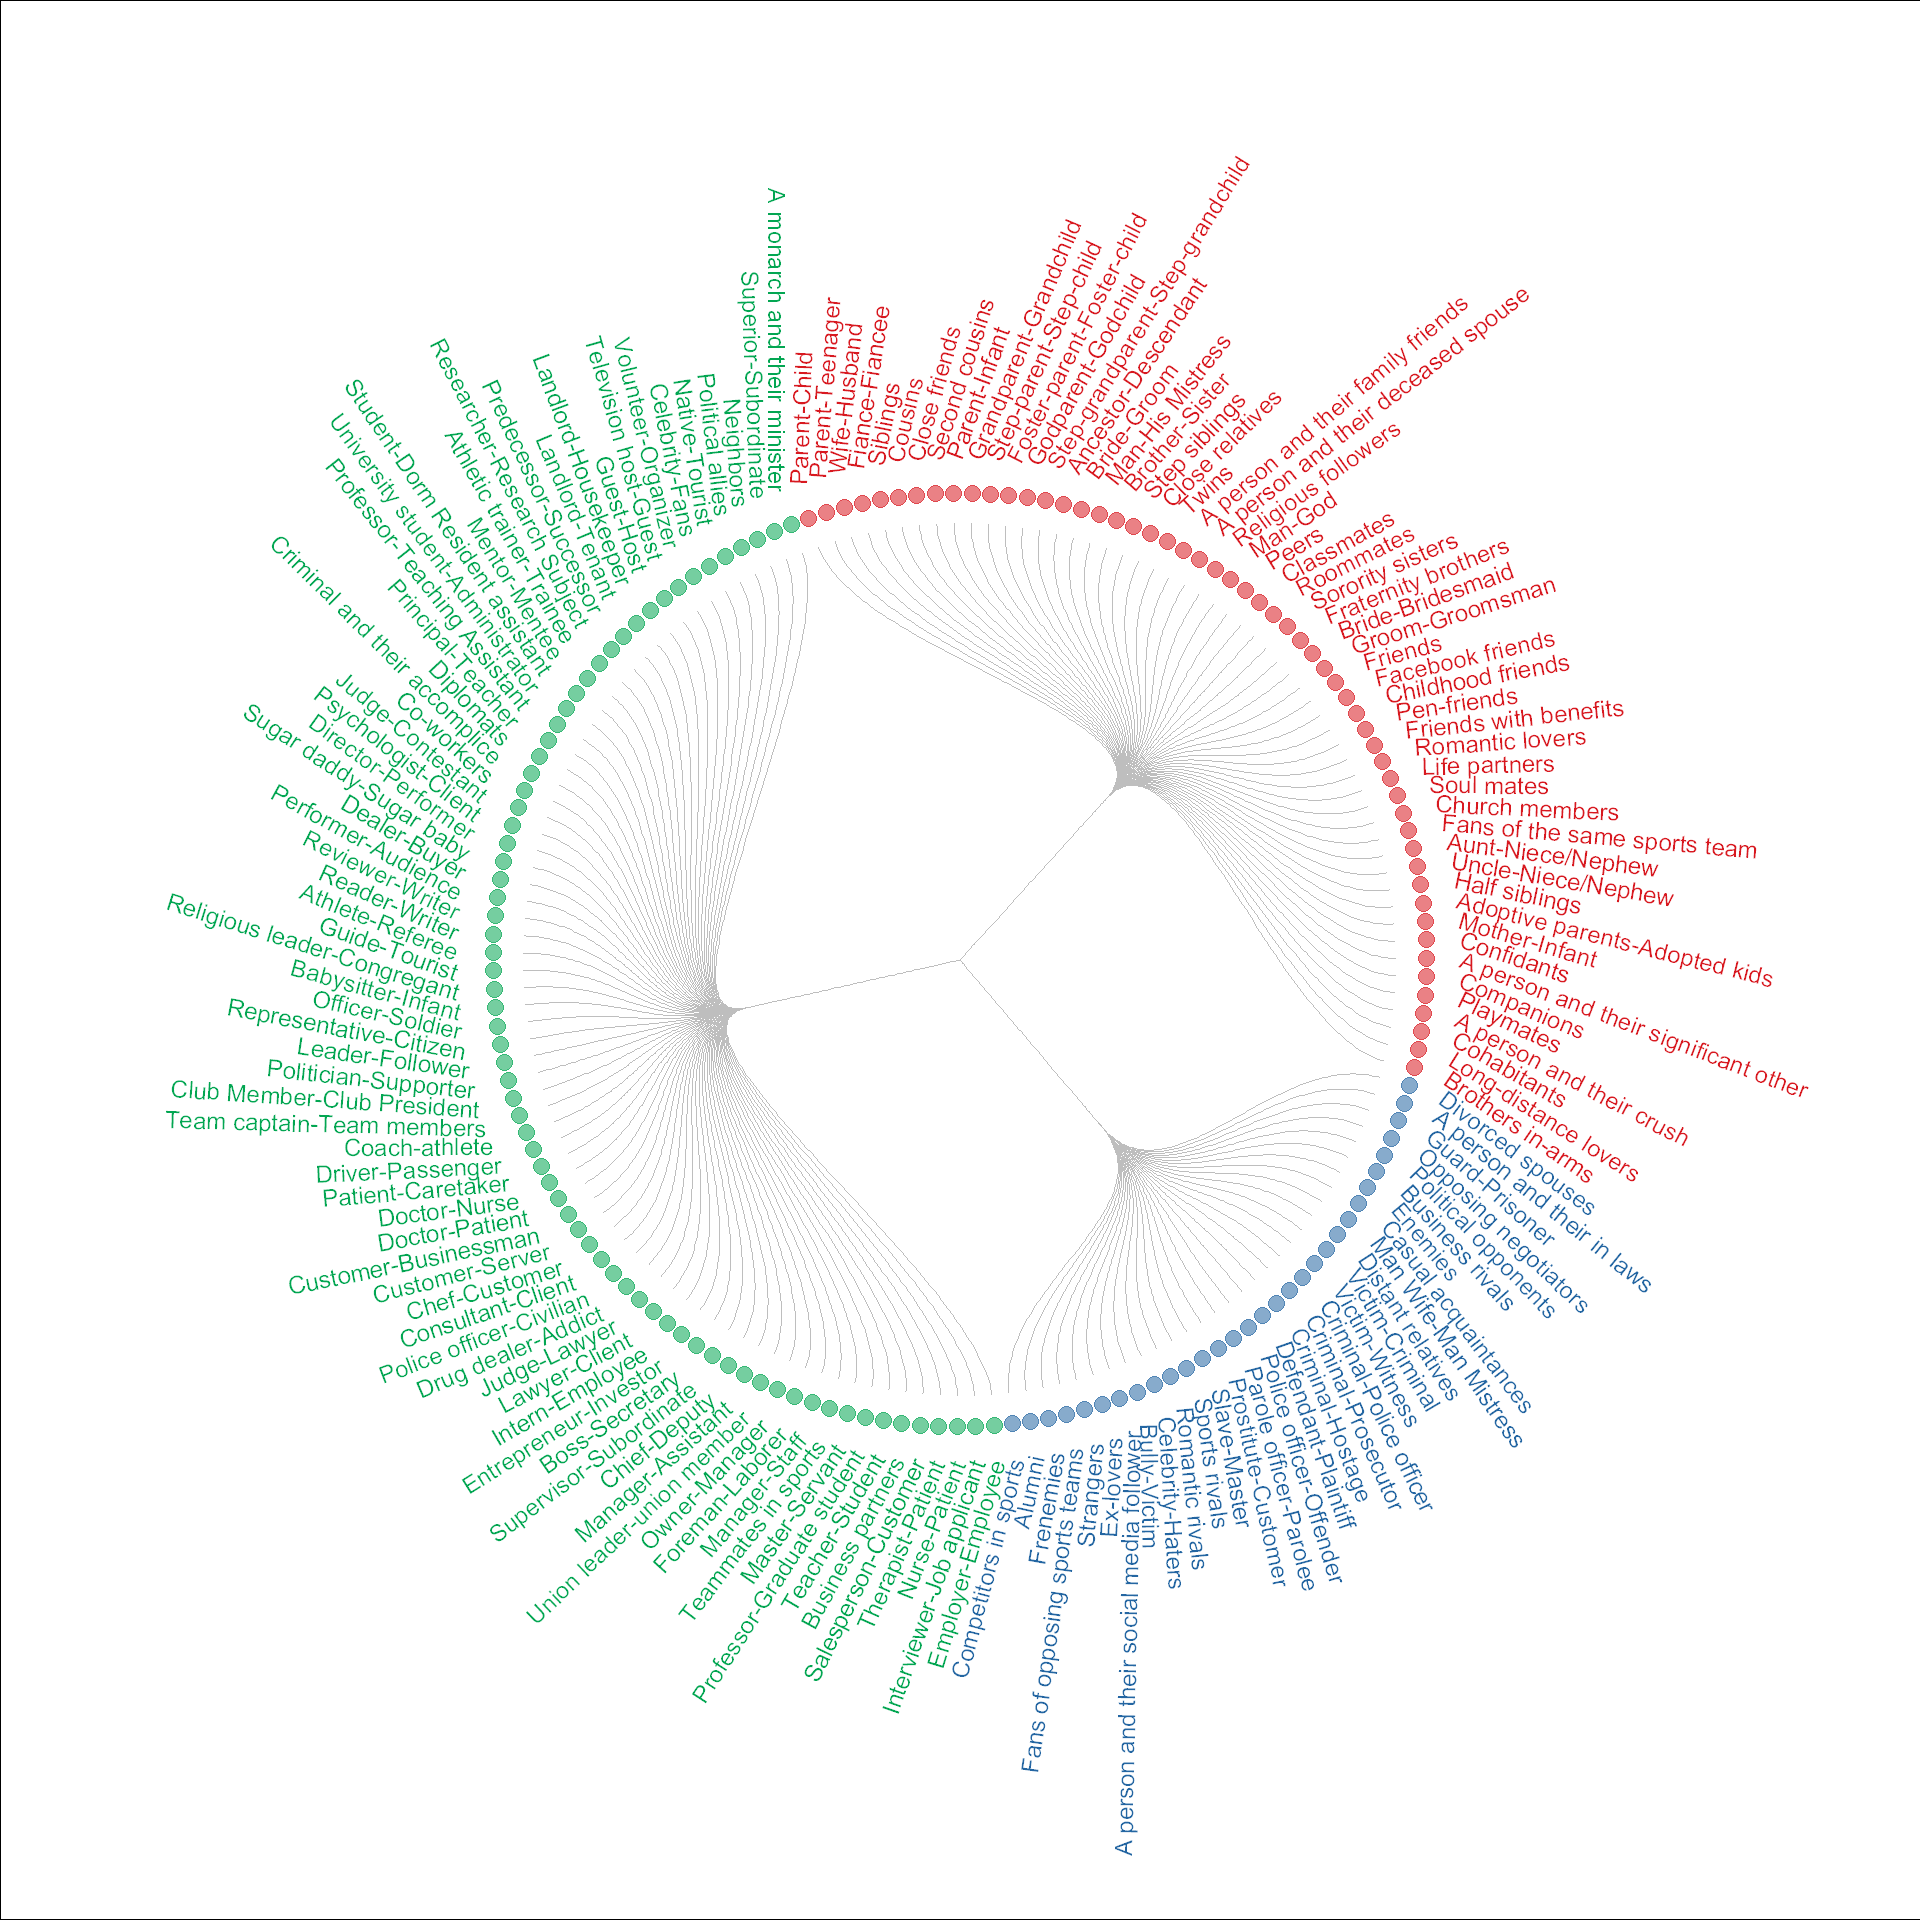

In [12]:
options(repr.plot.width=16,repr.plot.height=16)
my_colors = c('Hostile'='#2466A2','Public'='#03A652','Private'='#D81920')
# Make the plot
ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_edge_diagonal(colour="grey") +
  #scale_edge_colour_distiller(palette = "RdPu") +
  scale_colour_manual(values=my_colors)+
  geom_node_text(aes(x = x*1.15, y=y*1.15, filter = leaf, label=name, angle = angle, hjust=hjust, colour=group), size=5, alpha=1) +
  geom_node_point(aes(filter = leaf, x = x*1.07, y=y*1.07, colour=group, size=1, alpha=0.2)) +
  theme_void() +
  theme(
    legend.position="none",
    plot.margin=unit(c(0,0,0,0),"cm"),
    panel.background = element_rect(fill='white')
  ) +
  expand_limits(x = c(-2, 2), y = c(-2, 2))

png('../output_graph/world_averaged/raw_3k_white.png',family='sans',
    units='in',width=16,height=16,res=300)
# Make the plot
ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_edge_diagonal(colour="grey") +
  #scale_edge_colour_distiller(palette = "RdPu") +
  scale_colour_manual(values=my_colors)+
  geom_node_text(aes(x = x*1.15, y=y*1.15, filter = leaf, label=name, angle = angle, hjust=hjust, colour=group), size=5, alpha=1) +
  geom_node_point(aes(filter = leaf, x = x*1.07, y=y*1.07, colour=group, size=1, alpha=0.2)) +
  theme_void() +
  theme(
    legend.position="none",
    plot.margin=unit(c(0,0,0,0),"cm"),
    panel.background = element_rect(fill='white')
  ) +
  expand_limits(x = c(-2, 2), y = c(-2, 2))
dev.off()

## generate RDM based on cluster results: 0/1 matrix

In [8]:
raw_dissim = pd.read_csv('output_data/categorical_model/total_world/total_raw33d_dissim_3k.csv',
                        index_col=0)
raw_dissim_rdm = cluster_rdm(raw_dissim,cluster_model='cl_k3')
raw_dissim_rdm.to_csv('output_data/categorical_model/total_world/rdm_total_raw33d_dissim_3k.csv')

# Each region

In [9]:
CN_raw_data = pd.read_csv('../DataCleanPCA/output_data/cleaning_results/CHN/CHN_dim_rel_scaled.csv', index_col = 0)
HK_raw_data = pd.read_csv('../DataCleanPCA/output_data/cleaning_results/HK/HK_dim_rel_scaled.csv',index_col = 0)
UK_raw_data = pd.read_csv('../DataCleanPCA/output_data/cleaning_results/UK/UK_dim_rel_scaled.csv',index_col = 0)
ES_raw_data = pd.read_csv('../DataCleanPCA/output_data/cleaning_results/Spain/Spain_dim_rel_scaled.csv', index_col = 0)
US_raw_data = pd.read_csv('../DataCleanPCA/output_data/cleaning_results/USA/USA_dim_rel_scaled.csv',index_col = 0)
FR_raw_data = pd.read_csv('../DataCleanPCA/output_data/cleaning_results/France/France_dim_rel_scaled.csv', index_col = 0)
DE_raw_data = pd.read_csv('../DataCleanPCA/output_data/cleaning_results/Germany/Germany_dim_rel_scaled.csv', index_col = 0)
AU_raw_data = pd.read_csv('../DataCleanPCA/output_data/cleaning_results/Australia/Australia_dim_rel_scaled.csv', index_col = 0)
CL_raw_data = pd.read_csv('../DataCleanPCA/output_data/cleaning_results/Chile/Chile_dim_rel_scaled.csv', index_col = 0)
PT_raw_data = pd.read_csv('../DataCleanPCA/output_data/cleaning_results/Portugal/Portugal_dim_rel_scaled.csv', index_col = 0)
MX_raw_data = pd.read_csv('../DataCleanPCA/output_data/cleaning_results/Mexico/Mexico_dim_rel_scaled.csv', index_col = 0)
ZA_raw_data = pd.read_csv('../DataCleanPCA/output_data/cleaning_results/South_africa/South_africa_dim_rel_scaled.csv', index_col = 0)
BR_raw_data = pd.read_csv('../DataCleanPCA/output_data/cleaning_results/Brazil/Brazil_dim_rel_scaled.csv', index_col = 0)
IL_raw_data = pd.read_csv('../DataCleanPCA/output_data/cleaning_results/Israel/Israel_dim_rel_scaled.csv', index_col = 0)
RU_raw_data = pd.read_csv('../DataCleanPCA/output_data/cleaning_results/Russia/Russia_dim_rel_scaled.csv', index_col = 0)
JP_raw_data = pd.read_csv('../DataCleanPCA/output_data/cleaning_results/Japan/Japan_dim_rel_scaled.csv', index_col = 0)
EG_raw_data = pd.read_csv('../DataCleanPCA/output_data/cleaning_results/Egypt/Egypt_dim_rel_scaled.csv', index_col = 0)
IN_raw_data = pd.read_csv('../DataCleanPCA/output_data/cleaning_results/India/India_dim_rel_scaled.csv', index_col = 0)
QA_raw_data = pd.read_csv('../DataCleanPCA/output_data/cleaning_results/Qatar/Qatar_dim_rel_scaled.csv', index_col = 0)

In [10]:
regions = ['USA','UK','South_africa','Australia','Germany','Japan',
            'CHN','HK','France','Chile','Mexico','Spain','Portugal',
            'Brazil','Israel','Russia','Egypt','Qatar','India']
# contain raw output of models
raw_data_dict = {
'CHN' : CN_raw_data, 'HK' : HK_raw_data, 'UK' : UK_raw_data,
'Spain' : ES_raw_data,'USA' : US_raw_data, 'France' : FR_raw_data,
'Germany' : DE_raw_data, 'Australia' : AU_raw_data, 'Chile' : CL_raw_data,
'Portugal' : PT_raw_data, 'Mexico' : MX_raw_data, 'South_africa' : ZA_raw_data,
'Brazil' : BR_raw_data, 'Israel' : IL_raw_data, 'Russia' : RU_raw_data,
'Japan' : JP_raw_data, 'Egypt' : EG_raw_data,'Qatar': QA_raw_data,'India':IN_raw_data}

## clustering results

In [11]:
random_s = 4
for region in regions:
    dim_rel_scaled = raw_data_dict[region]
    dim_rel_scaled.index = relationships
    raw_results = clustering.create_cluster_models(data_type = "df",data = dim_rel_scaled,
                        methods=['KMeans'],ks=[3],keep_orig=True)
    raw_results.to_csv('output_data/categorical_model/each_region/raw_dissim/33d/'+\
                      region+'_raw_3k.csv')
    print()
    print('{} 3 KMeans clusters in raw data:'.format(region))
    for n in range(len(raw_results['cl_k3'].unique())):
        each_cluster = raw_results.index[raw_results['cl_k3']==n]
        print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
        print(*raw_results.index[raw_results['cl_k3']==n], sep = ", ")
        
    print('***************************************************')


USA 3 KMeans clusters in raw data:

Cluster 1 Relationship:68
Employer and Employee, Interviewer and Job applicant, Nurse and Patient, Therapist and Patient, Salesperson and Customer, Between Business Partners, Teacher and Student, Professor and Graduate student, Between teammates in sports, Manager and Staff, Foreman and Laborer, Owner and Manager, Union leader and union member, Manager and Assistant, Chief and Deputy, Supervisor and Subordinate, Boss and Secretary, Entrepreneur and Investor, Intern and Employee, Lawyer and Client, Judge and Lawyer, Drug dealer and Addict, Police officer and Civilian, Consultant and Client, Chef and Customer, Customer and Server, Customer and Businessman, Doctor and Patient, Doctor and Nurse, Patient and Caretaker, Driver and Passenger, Coach and athlete, Team Captain and Team Members, Club Member and Club President, Politician and Supporter, Leader and Follower, Representative and Citizen, Officer and Soldier, Religious leader and Congregant, Guide 


Germany 3 KMeans clusters in raw data:

Cluster 1 Relationship:41
Parent and Child, Parent and Teenager, Wife and Husband, Fiance and Fiancee, Between Siblings, Between Close Friends, Parent and Infant, Grandparent and Grandchild, Step-parent and Step-child, Foster-parent and Foster-child, Godparent and Godchild, Bride and Groom, Man and His Mistress, Brother and Sister, Between close relatives, Between twins, Between a person and their family friends, Between a person and their deceased spouse, Babysitter and Infant, Between classmates, Between roommates, Between fraternity brothers, Bride and Bridesmaid, Groom and Groomsman, Guest and Host, Between friends, Between childhood friends, Between romantic lovers, Between life-partners, Between soul-mates, Aunt and Niece/Nephew, Uncle and Niece/Nephew, Between half-siblings, Between adoptive parents and adopted kids, Mother and Infant, Between confidants, Between a person and their significant other, Between companions, Between playmates,


Chile 3 KMeans clusters in raw data:

Cluster 1 Relationship:67
Employer and Employee, Interviewer and Job applicant, Nurse and Patient, Therapist and Patient, Salesperson and Customer, Between Business Partners, Teacher and Student, Professor and Graduate student, Master and Servant, Between teammates in sports, Manager and Staff, Foreman and Laborer, Owner and Manager, Union leader and union member, Manager and Assistant, Chief and Deputy, Supervisor and Subordinate, Boss and Secretary, Entrepreneur and Investor, Intern and Employee, Lawyer and Client, Judge and Lawyer, Drug dealer and Addict, Police officer and Civilian, Consultant and Client, Chef and Customer, Customer and Server, Customer and Businessman, Doctor and Patient, Doctor and Nurse, Driver and Passenger, Coach and athlete, Club Member and Club President, Politician and Supporter, Leader and Follower, Representative and Citizen, Officer and Soldier, Religious leader and Congregant, Guide and Tourist, Athlete and Referee


Brazil 3 KMeans clusters in raw data:

Cluster 1 Relationship:74
Employer and Employee, Interviewer and Job applicant, Nurse and Patient, Therapist and Patient, Salesperson and Customer, Between Business Partners, Between opposing negotiators, Between business rivals, Teacher and Student, Professor and Graduate student, Master and Servant, Between teammates in sports, Manager and Staff, Foreman and Laborer, Owner and Manager, Manager and Assistant, Chief and Deputy, Supervisor and Subordinate, Boss and Secretary, Entrepreneur and Investor, Intern and Employee, Lawyer and Client, Judge and Lawyer, Police officer and Civilian, Consultant and Client, Chef and Customer, Customer and Server, Customer and Businessman, Doctor and Patient, Doctor and Nurse, Patient and Caretaker, Driver and Passenger, Coach and athlete, Team Captain and Team Members, Club Member and Club President, Politician and Supporter, Leader and Follower, Representative and Citizen, Officer and Soldier, Religious leader


Egypt 3 KMeans clusters in raw data:

Cluster 1 Relationship:65
Employer and Employee, Interviewer and Job applicant, Nurse and Patient, Therapist and Patient, Salesperson and Customer, Between Business Partners, Between teammates in sports, Ancestor and Descendant, Between distant relatives, Manager and Staff, Foreman and Laborer, Owner and Manager, Union leader and union member, Manager and Assistant, Chief and Deputy, Supervisor and Subordinate, Boss and Secretary, Entrepreneur and Investor, Intern and Employee, Lawyer and Client, Judge and Lawyer, Consultant and Client, Chef and Customer, Customer and Server, Customer and Businessman, Doctor and Patient, Patient and Caretaker, Driver and Passenger, Coach and athlete, Club Member and Club President, Politician and Supporter, Leader and Follower, Representative and Citizen, Officer and Soldier, Guide and Tourist, Athlete and Referee, Reader and Writer, Reviewer and Writer, Performer and Audience, Dealer and Buyer, Director and Perfo

## generate RDM based on cluster results: 0/1 matrix

In [12]:
cluster_raw_dissim_paths = glob.glob('output_data/categorical_model/each_region/raw_dissim/33d/*.csv')

# kmeans clustering using raw data
for region_dir in cluster_raw_dissim_paths:
    region_input = pd.read_csv(region_dir, index_col=0)
    region_cluster_rdm = cluster_rdm(region_input,cluster_model='cl_k3')
    
    region_csv = region_dir.split('\\')[1]
    region_cluster_rdm.to_csv('output_data/categorical_model/each_region/rdm_results/33d/'+region_csv)